In [2]:
import pandas as pd

data = 'combine.csv'

df = pd.read_csv(data, sep=';')

In [4]:
pip install geopandas matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 4.4 MB/s eta 0:00:0000:0100:01
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-_7n22wzb
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-_7n22wzb
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc26

In [7]:
import cartiflette.s3 as s3

In [94]:
dep = s3.download_vectorfile_url_all(
    values = "metropole",
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="topojson",
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

dep["area"] = dep.to_crs(2154).area

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=DEPARTEMENT/crs=4326/FRANCE_ENTIERE=metropole/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 7.17MiB [00:00, 13.1MiB/s]


In [99]:
dep['nb_feu']=0

In [100]:
valeurs_a_remplacer = {'1': '01', '2':'02','3': '03', '4': '04', '5':'05', '6':'06', '7':'07', '8':'08', '9':'09'}
df['Département'] = df['Département'].replace(valeurs_a_remplacer)

In [135]:
counts = df['Département'].value_counts().to_frame().reset_index()

In [137]:
counts.loc[len(counts)] = ['75', 0]

In [138]:
counts.loc[len(counts)] = ['92', 0]

In [139]:
counts.loc[len(counts)] = ['93', 0]

In [141]:
counts = counts.set_index('Département')

In [144]:
for i in range(0, 96):
    num = dep.loc[i, 'INSEE_DEP']
    a = counts.loc[num, 'count']
    dep.loc[i, 'nb_feu']=a

on traite le departement:  01
le nombre de feu est de: 60
on traite le departement:  02
le nombre de feu est de: 17
on traite le departement:  2A
le nombre de feu est de: 4404
on traite le departement:  2B
le nombre de feu est de: 4543
on traite le departement:  03
le nombre de feu est de: 24
on traite le departement:  04
le nombre de feu est de: 842
on traite le departement:  05
le nombre de feu est de: 205
on traite le departement:  06
le nombre de feu est de: 1644
on traite le departement:  07
le nombre de feu est de: 1422
on traite le departement:  08
le nombre de feu est de: 48
on traite le departement:  09
le nombre de feu est de: 131
on traite le departement:  10
le nombre de feu est de: 21
on traite le departement:  11
le nombre de feu est de: 2734
on traite le departement:  12
le nombre de feu est de: 505
on traite le departement:  13
le nombre de feu est de: 3527
on traite le departement:  14
le nombre de feu est de: 6
on traite le departement:  15
le nombre de feu est de: 38

In [147]:
def couleur(chiffre):
    if chiffre==0:
        return 0
    elif chiffre < 100:
        return 1
    elif chiffre < 500:
        return 2
    elif chiffre < 1500:
        return 3
    else:
        return 4

In [148]:
dep['categorie']=dep['nb_feu'].apply(couleur)

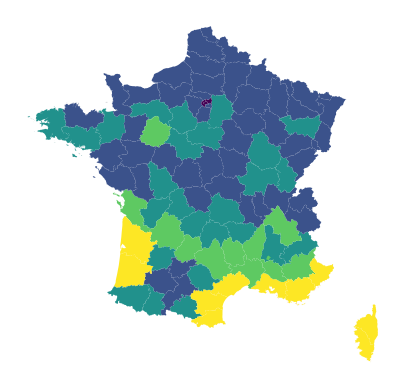

In [151]:
ax = dep.plot(column = "categorie")
ax.set_axis_off()

In [152]:
dep.head()

,id,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,source,territoire,geometry,area,nb_feu,categorie
0,DEPARTEM_FXX_00000000001,NaN,AIN,Ain,01,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09,60,1
1,DEPARTEM_FXX_00000000002,NaN,AISNE,Aisne,02,32,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09,17,1
2,DEPARTEM_FXX_00000000003,NaN,CORSE-DU-SUD,Corse-du-Sud,2A,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((8.59803 41.88006, 8.59803 41.8...",4.033539e+09,4404,4
3,DEPARTEM_FXX_00000000004,NaN,HAUTE-CORSE,Haute-Corse,2B,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((9.40793 43.02585, 9.40793 43.0...",4.720673e+09,4543,4
4,DEPARTEM_FXX_00000000005,NaN,ALLIER,Allier,03,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.56379 46.53199, 2.56379 46.53189, ...",7.365673e+09,24,1


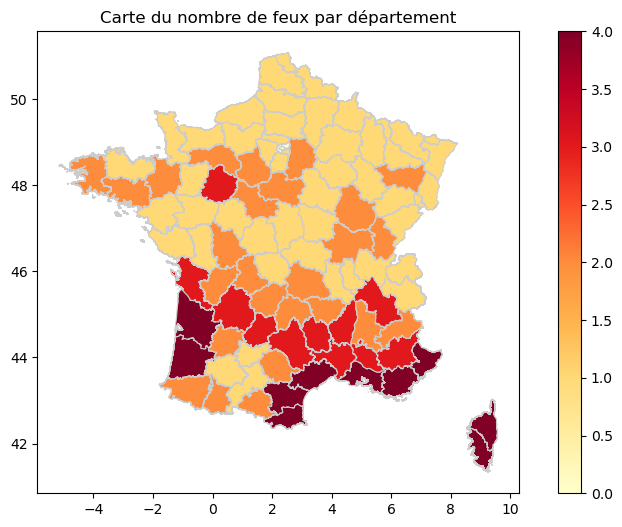

In [154]:
# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap = 'YlOrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['categorie'].min(), dep['categorie'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
ax = dep.plot(column="categorie", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)



# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


/tmp/ipykernel_228/3481192342.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


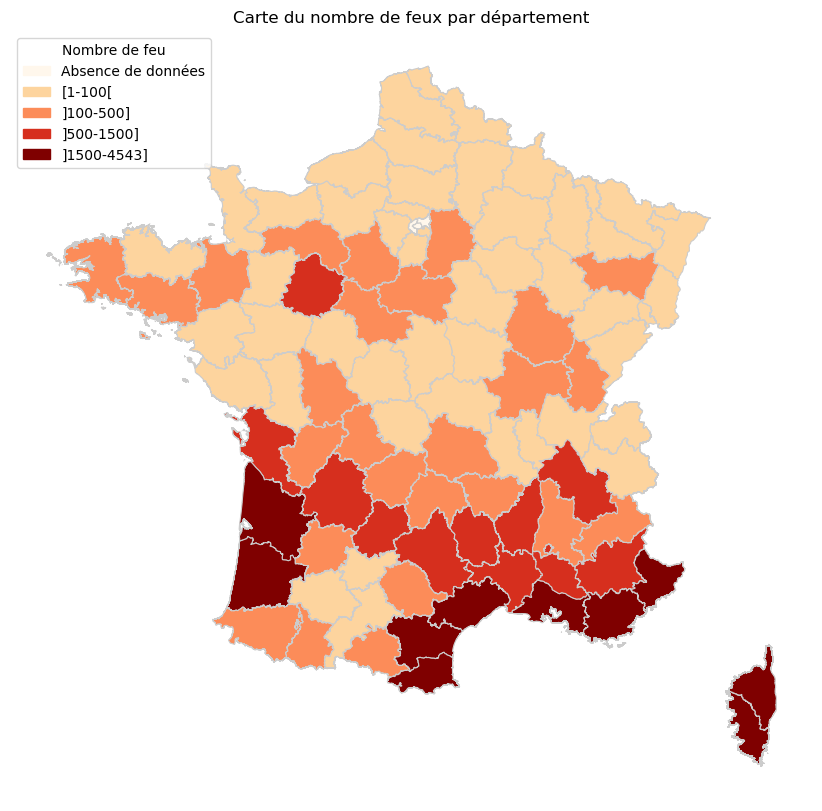

In [169]:
from matplotlib.colors import to_rgba
from matplotlib.patches import Patch

# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap_name = 'OrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['categorie'].min(), dep['categorie'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
plot = dep.plot(column="categorie", cmap=cmap_name, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=vmin, vmax=vmax)

# Récupérer les couleurs de la colormap
cmap = plt.cm.get_cmap(cmap_name)
colors = [to_rgba(cmap(i)) for i in range(cmap.N)]

# Personnaliser l'affichage de la légende
legend_labels = ['Absence de données', '[1-100[', ']100-500]', ']500-1500]', ']1500-4543]']  # Remplacez par les descriptions de votre choix
legend_patches = [Patch(color=colors[0], label=legend_labels[0]),
                  Patch(color=colors[64], label=legend_labels[1]), Patch(color=colors[128], label=legend_labels[2]), Patch(color=colors[192], label=legend_labels[3]), Patch(color=colors[255], label=legend_labels[4])]

ax.legend(handles=legend_patches, loc='upper left', title='Nombre de feu')

# Masquer les axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


In [216]:
# Calculer le nombre d'occurrences par département
counts2 = df['Département'].value_counts().to_frame().reset_index()

# Calculer la somme des surfaces par département
surface_sum = df.groupby('Département')['Surface parcourue (m2)'].sum().reset_index()
surface_sum.columns = ['Département', 'surface']

# Fusionner les deux DataFrames sur la colonne 'Département'
result = pd.merge(counts, surface_sum, on='Département')


In [217]:
result.head()

,Département,count,surface
0,2B,4543,221122629
1,2A,4404,126433930
2,13,3527,141670553
3,33,3298,352567022
4,34,2799,145380586


In [218]:
def rat(count, surface):
    return surface/count if surface!=0 else 0

In [219]:
result['ratio']=result.apply(lambda row : rat(row['count'], row['surface']), axis=1)

In [220]:
result.head()

,Département,count,surface,ratio
0,2B,4543,221122629,48673.261941
1,2A,4404,126433930,28708.885104
2,13,3527,141670553,40167.437766
3,33,3298,352567022,106903.281383
4,34,2799,145380586,51940.187924


In [221]:
result.loc[len(result)] = ['93', 0, 0, 0]

In [222]:
result.loc[len(result)] = ['92', 0, 0, 0]

In [223]:
result.loc[len(result)] = ['75', 0, 0, 0]

In [224]:
result = result.set_index('Département')

In [225]:
dep['ratio']=0

In [226]:
for i in range(0, 96):
    num = dep.loc[i, 'INSEE_DEP']
    a = result.loc[num, 'ratio']
    dep.loc[i, 'ratio']=a

/tmp/ipykernel_228/204975787.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38783.333333333336' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dep.loc[i, 'ratio']=a


In [232]:
def couleur_ratio(chiffre):
    if chiffre/10000 ==0:
        return 0
    elif chiffre/10000 <= 1:
        return 1
    elif chiffre/10000<= 4.6:
        return 2
    elif chiffre/10000 < 10:
        return 3
    else:
        return 4

In [233]:
dep['cat'] = dep['ratio'].apply(couleur_ratio)

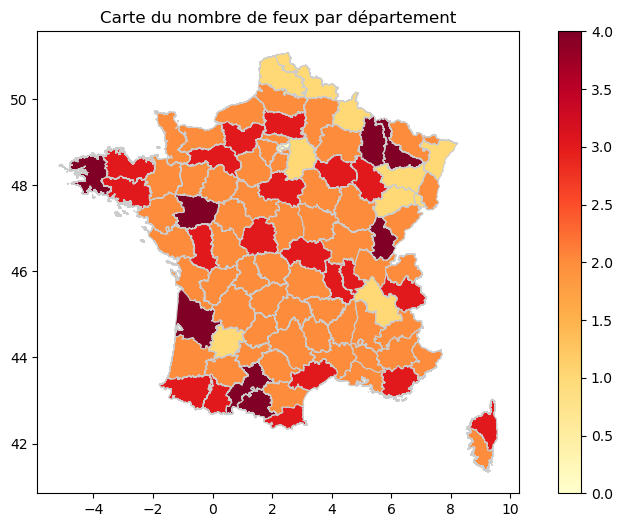

In [234]:
# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap = 'YlOrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['cat'].min(), dep['cat'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
ax = dep.plot(column="cat", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)



# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


In [238]:
result.loc['50', 'ratio']/10000

3.885016279069767

In [240]:
dep.head()

,id,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,source,territoire,geometry,area,nb_feu,categorie,ratio,cat
0,DEPARTEM_FXX_00000000001,NaN,AIN,Ain,01,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09,60,1,38783.333333,2
1,DEPARTEM_FXX_00000000002,NaN,AISNE,Aisne,02,32,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09,17,1,33471.470588,2
2,DEPARTEM_FXX_00000000003,NaN,CORSE-DU-SUD,Corse-du-Sud,2A,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((8.59803 41.88006, 8.59803 41.8...",4.033539e+09,4404,4,28708.885104,2
3,DEPARTEM_FXX_00000000004,NaN,HAUTE-CORSE,Haute-Corse,2B,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((9.40793 43.02585, 9.40793 43.0...",4.720673e+09,4543,4,48673.261941,3
4,DEPARTEM_FXX_00000000005,NaN,ALLIER,Allier,03,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.56379 46.53199, 2.56379 46.53189, ...",7.365673e+09,24,1,82732.083333,3


In [241]:
dep['surface brulee']=0

In [242]:
for i in range(0, 96):
    num = dep.loc[i, 'INSEE_DEP']
    a = result.loc[num, 'surface']
    dep.loc[i, 'surface brulee']=a

In [249]:
dep['nouveau_ratio']=dep.apply(lambda row: rat(row['surface brulee'],row['area']), axis=1)

ZeroDivisionError: float division by zero

In [ ]:
# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap = 'YlOrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['nouveau ratio'].min(), dep['nouveau ratio'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
ax = dep.plot(column="cat", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)



# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


In [248]:
dep['nouveau_ratio']

0     0.000403
1     0.000077
2     0.031346
3     0.046841
4     0.000270
        ...   
91    0.000433
92    0.000000
93    0.000000
94    0.000082
95    0.000142
Name: nouveau_ratio, Length: 96, dtype: float64